# 5. Generar índices normalizados (NDVI)
### Por: David Alonso Rueda Rodríguez
#### Esta actividad requiere la ejecución de las siguentes librerías:
- earthpy
- rasterio

In [2]:
import earthpy.spatial as es
import earthpy.plot as ep
import rasterio as ras
import numpy as np

In [3]:
sentinel_url = 'src/Sentinel/earthpy/Sentinel_AOI2.jp2'

In [4]:
with ras.open(sentinel_url) as src:
    sentinel = src.read()
    out_meta = src.profile

In [6]:
# Aplicar índice normalizado
sentinel_ndvi = es.normalized_diff(sentinel[3], sentinel[2])

In [7]:
sentinel_ndvi.dtype

dtype('float64')

In [8]:
out_meta['count'] = 1
out_meta['dtype'] = 'float64'
out_meta

{'driver': 'GTiff', 'dtype': 'float64', 'nodata': None, 'width': 1999, 'height': 2033, 'count': 1, 'crs': CRS.from_epsg(32618), 'transform': Affine(10.0, 0.0, 437870.0,
       0.0, -10.0, 510770.0), 'tiled': False, 'interleave': 'pixel'}

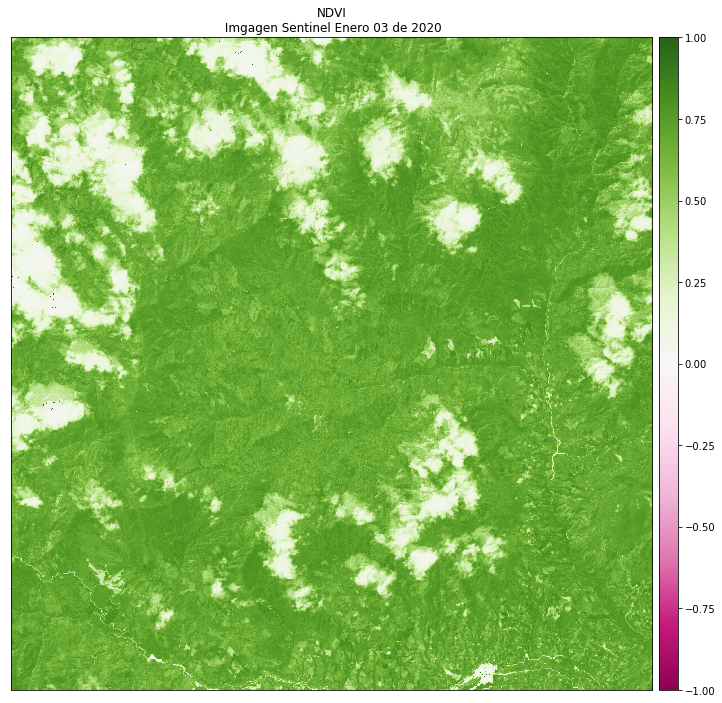

In [9]:
#
# Verificar el resultado de la operación
title="NDVI\n Imgagen Sentinel Enero 03 de 2020"
ep.plot_bands(sentinel_ndvi, figsize=(12,12), vmin=-1, vmax=1, scale=False,cmap='PiYG', title=title)

In [102]:
# Guardar archivo en directorio de interés
output_file = 'src/Sentinel/earthpy/Sentinel_NDVI.tif'
with ras.open(output_file, 'w', **out_meta) as dst:
    dst.write(sentinel_ndvi, 1)

Procedimiento alternativo para creación de NDVI
https://medium.com/analytics-vidhya/satellite-imagery-analysis-with-python-3f8ccf8a7c32